<a href="https://colab.research.google.com/github/jeanmichael1993/Desafio_2_BootcampAnalistaDados/blob/master/Desafio_2_BootcampAnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Modelagem de Dados**

A modelagem de dados com **Pandas** e **SQLite** é uma **habilidade valiosa** para cientistas de dados, analistas de dados e programadores que precisam **manipular, analisar e armazenar grandes volumes de dados**.

Essas ferramentas permitem aos usuários trabalhar com dados de forma eficiente, utilizando recursos poderosos de manipulação e agregação, além de possibilitar a interação com banco de dados relacionais, como o SQLite.

Com o **Pandas e o SQLite**, é possível realizar **operações de manipulação**, **agregação** e **junção de dados de forma eficiente**, permitindo que os usuários trabalhem com grandes volumes de dados com facilidade. A combinação dessas ferramentas permite a criação de modelos de dados que são escaláveis, fáceis de gerenciar e flexíveis o suficiente para se adaptar às necessidades em constante mudança de negócios e organizações.

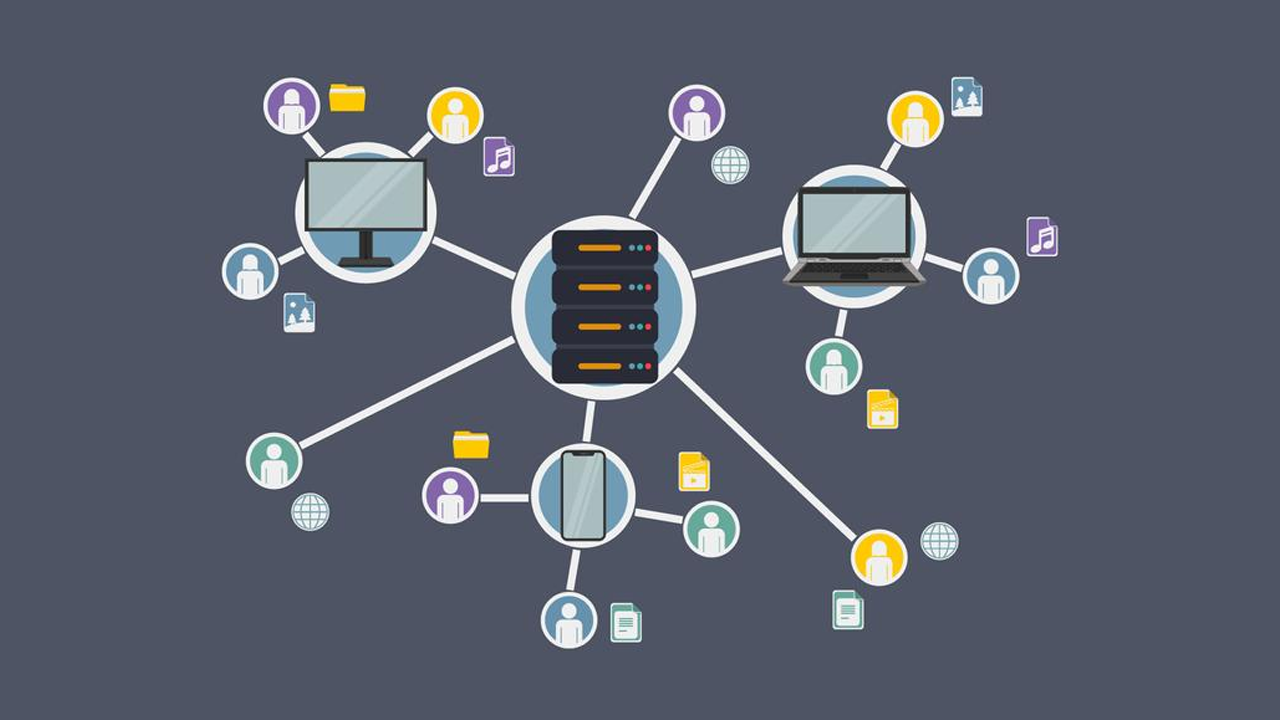

***Seu objetivo cruzar os dados e salver em um banco SQlite.***

Descrição dos dados.<br>
Na base em excel tem 3 Abas
1. Aba: **Tab_Vendas** - Representa as vendas feita na loja
2. Aba: **Tab_Vendedor** - Contém o nome dos vendedores
3. Aba: **Tab_Produto** - Contém a descrição dos produtos


O que você de fazer:
## 1. Cruzar todos os dados em uma unica tabela:
  *   Cruzar a aba de Vendas com a Aba Vendedor pelo ID
  *   Cruzar depois com a Aba Produto






In [2]:
#Imports
import numpy as np
import pandas as pd
import sqlite3
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Carregandos os dados
tab_vendas = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/arquivos/Dados_Vendas.xlsx', 'Tab_Vendas')
tab_vendedor = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/arquivos/Dados_Vendas.xlsx', 'Tab_Vendedor')
tab_produto = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/arquivos/Dados_Vendas.xlsx', 'Tab_Produto')

###Cruzando os dados

In [7]:
tab_vendas.head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda
0,1,3,9,2023-04-03,279.9
1,2,3,3,2023-04-20,699.9
2,3,2,6,2023-04-09,399.9
3,4,3,5,2023-04-21,399.9
4,5,3,3,2023-04-28,699.9


In [8]:
tab_vendedor.head()

,Id_Vendedor,Vendedor
0,1,Marie Curie
1,2,Malala Yousafzai
2,3,Rosa Parks


In [11]:
base1 = pd.merge(tab_vendas, tab_vendedor, how='inner', on=['Id_Vendedor'])

In [12]:
tab_produto.head()

,Id_Produto,Descrição_Produto
0,1,Sandália Preta Couro Salto Alto Tratorada
1,2,Bota Marrom Couro Cano Médio Western Georgia
2,3,Bota Preta Couro Cano Médio Western Georgia
3,4,\nSapatilha Marrom Couro Bico Fino Madison
4,5,\nSapatilha Dourada Couro Bico Fino Fivela


In [13]:
base1.head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor
0,1,3,9,2023-04-03,279.9,Rosa Parks
1,2,3,3,2023-04-20,699.9,Rosa Parks
2,4,3,5,2023-04-21,399.9,Rosa Parks
3,5,3,3,2023-04-28,699.9,Rosa Parks
4,14,3,5,2023-04-13,399.9,Rosa Parks


In [14]:
base_vendas = pd.merge(base1, tab_produto, how='inner', on='Id_Produto')

In [15]:
base_vendas.head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor,Descrição_Produto
0,1,3,9,2023-04-03,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
1,20,3,9,2023-04-27,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
2,27,3,9,2023-04-14,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
3,8,2,9,2023-04-01,279.9,Malala Yousafzai,Sapatilha Preta Couro Bico Quadrado Charlotte
4,48,2,9,2023-04-02,279.9,Malala Yousafzai,Sapatilha Preta Couro Bico Quadrado Charlotte


# 2. Criar três análises usando os dados cruzados

**1º Faça uma analise das vendas dos vendedores, igual o exemplo abaixo.**

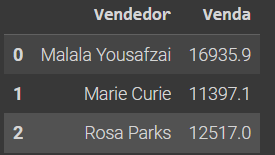

In [27]:
Analise_Vendedor = base_vendas.groupby(by='Vendedor')['Venda'].sum().sort_values(ascending=False).head(3).reset_index()
Analise_Vendedor

,Vendedor,Venda
0,Malala Yousafzai,16935.9
1,Rosa Parks,12517.0
2,Marie Curie,11397.1


2º Fala uma analise dos produtos vendidos, igual o exemplo abaixo.

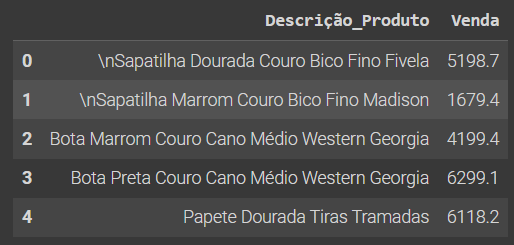

In [35]:

Analise_Produto = base_vendas.groupby(by='Descrição_Produto')['Venda'].sum().sort_values(ascending=False).reset_index()
Analise_Produto

,Descrição_Produto,Venda
0,Bota Preta Couro Cano Médio Western Georgia,6299.1
1,Papete Dourada Tiras Tramadas,6118.2
2,\nSapatilha Dourada Couro Bico Fino Fivela,5198.7
3,Sapatilha Preta Couro Bico Fino Fivela,5198.7
4,Bota Marrom Couro Cano Médio Western Georgia,4199.4
5,Sandália Preta Salto Bloco Platino,3958.9
6,Sandália Dourada Salto Bloco Prata Velho,2879.2
7,Sandália Preta Couro Salto Alto Tratorada,2799.3
8,Sapatilha Preta Couro Bico Quadrado Charlotte,2519.1
9,\nSapatilha Marrom Couro Bico Fino Madison,1679.4


3º Faça uma analise das vendas diarias da loja, igual o exemplo abaixo.
<br>
<br>
*dica: para gerar o dia da semana utilize a função 'pd.Grouper', mas fique a vontade de fazer outra forma.*


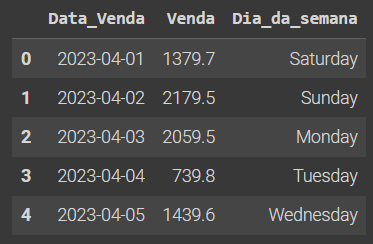

In [30]:
# Cria analise anterior
Analise_Vendas = base_vendas.groupby( pd.Grouper(key='Data_Venda', freq='D') )['Venda'].sum().reset_index()

# Incluindo o dia da semana
Analise_Vendas['Dia_da_semana'] = Analise_Vendas['Data_Venda'].dt.strftime('%A')

Analise_Vendas.head()

,Data_Venda,Venda,Dia_da_semana
0,2023-04-01,1379.7,Saturday
1,2023-04-02,2179.5,Sunday
2,2023-04-03,2059.5,Monday
3,2023-04-04,739.8,Tuesday
4,2023-04-05,1439.6,Wednesday


# 3. Exporte esses dados para 3 tabelas do SQLite

In [23]:
base_vendas.head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor,Descrição_Produto
0,1,3,9,2023-04-03,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
1,20,3,9,2023-04-27,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
2,27,3,9,2023-04-14,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
3,8,2,9,2023-04-01,279.9,Malala Yousafzai,Sapatilha Preta Couro Bico Quadrado Charlotte
4,48,2,9,2023-04-02,279.9,Malala Yousafzai,Sapatilha Preta Couro Bico Quadrado Charlotte


In [31]:
# Criar um banco de dados
Conexao = sqlite3.connect('Banco_Dados')

# Apontar para o banco
Cursor = Conexao.cursor()

In [32]:
#Enviando os dados

Analise_Vendas.to_sql(
    #Nome da Tabela
    name = 'Tab_Vendas',
    #Ignorar o index
    index = False,
    #Caso exista
    if_exists = 'append',
    #Conexão
    con = Conexao
)


29

In [36]:
#Enviado os dados

Analise_Produto.to_sql(
    #Nome da Tabela
    name = 'Tab_Produtos',
    #Ignorar o index
    index = False,
    #Caso exista
    if_exists = 'append',
    #conexão
    con = Conexao
)

10

In [38]:
#Enviado os dados

Analise_Vendedor.to_sql(
    #Nome da tabela
    name = 'Tab_Vendedor',
    #ignorar o index
    index = False,
    #Caso exista
    if_exists = 'append',
    #conexão
    con = Conexao
)

3

In [39]:
#Verificar as tabelas no banco de dados
Cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#obter os resultados da consulta
tabelas = Cursor.fetchall()

#imprimir o nome das tabelas
for tabela in tabelas:
  print(tabela[0])



Tab_Vendas
Tab_Produtos
Tab_Vendedor


In [40]:
#Buscando os dados do banco de dados

pd.read_sql('select * from Tab_Vendas', Conexao).head()

,Data_Venda,Venda,Dia_da_semana
0,2023-04-01 00:00:00,1379.7,Saturday
1,2023-04-02 00:00:00,2179.5,Sunday
2,2023-04-03 00:00:00,2059.5,Monday
3,2023-04-04 00:00:00,739.8,Tuesday
4,2023-04-05 00:00:00,1439.6,Wednesday
